(3, 300) samples, 300 features
Sample 1: Anomalous
Sample 2: Anomalous
Sample 3: Anomalous


/tmp/ipykernel_999321/625335980.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")


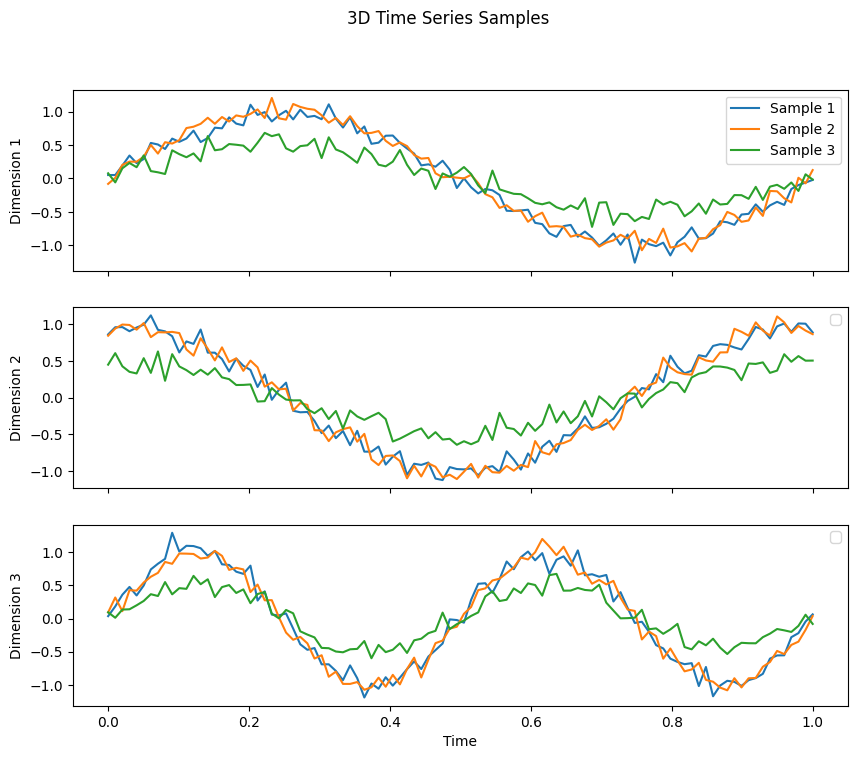

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Generate synthetic 3D time series data
np.random.seed(42)

# Time
time = np.linspace(0, 1, 100)

# Normal samples
sample_1 = np.stack([
    np.sin(2 * np.pi * time) + np.random.normal(0, 0.1, size=time.shape),
    np.cos(2 * np.pi * time) + np.random.normal(0, 0.1, size=time.shape),
    np.sin(4 * np.pi * time) + np.random.normal(0, 0.1, size=time.shape)
], axis=1)

sample_2 = np.stack([
    np.sin(2 * np.pi * time) + np.random.normal(0, 0.1, size=time.shape),
    np.cos(2 * np.pi * time) + np.random.normal(0, 0.1, size=time.shape),
    np.sin(4 * np.pi * time) + np.random.normal(0, 0.1, size=time.shape)
], axis=1)

# Anomalous sample
sample_3 = np.stack([
    0.5 * np.sin(2 * np.pi * time) + np.random.normal(0, 0.1, size=time.shape),
    0.5 * np.cos(2 * np.pi * time) + np.random.normal(0, 0.1, size=time.shape),
    0.5 * np.sin(4 * np.pi * time) + np.random.normal(0, 0.1, size=time.shape)
], axis=1)

# Combine into a dataset
data = np.stack([sample_1, sample_2, sample_3], axis=0)

# Flatten each 3D time series for OneClassSVM (2D input required)
data_flattened = data.reshape(data.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_flattened)

# Train OneClassSVM on normal samples (first two)
svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.5)
svm.fit(data_scaled[:2])  # Train with only normal data

print(f"{data_scaled.shape} samples, {data_scaled.shape[1]} features")

# Predict on all samples
predictions = svm.predict(data_scaled)

# Output results
for i, pred in enumerate(predictions):
    status = "Normal" if pred == 1 else "Anomalous"
    print(f"Sample {i + 1}: {status}")

# Visualize the 3D time series
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
for i, (ax, dim) in enumerate(zip(axes, ['Dimension 1', 'Dimension 2', 'Dimension 3'])):
    for j, sample in enumerate(data):
        ax.plot(time, sample[:, i], label=f"Sample {j + 1}" if i == 0 else None)
    ax.set_ylabel(dim)
    ax.legend(loc="upper right")

plt.xlabel("Time")
plt.suptitle("3D Time Series Samples")
plt.show()
